<a href="https://colab.research.google.com/github/nJasow04/A1111-webui/blob/master/M148_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS M148 Homework Assignment 1

I certify that I have completed all parts of this assignment on my own. **[TODO: Fill your name and UID here.]**
- Name: Jason Wan
- UID: 906057547

Due date: Wednesday, July 3 at 11:59 PM PDT

Instruction: You may form small groups (e.g. of up to four people) to work on this assignment, but you must write up all solutions by yourself. The Homework needs to be submitted on BruinLearn and please refer to the late submission policy in Lecture one.

## 1. Polling Data Collection and Analysis (8 pts)
Your friend working at the Los Angeles Mayor's office has been given the task of determining how voters feel about the mayor's performance, and his chances of winning reelection. Your friend wants to accomplish this by conducting a voluntary poll, and has decided to advertise the poll on certain popular social media sites in order to get a large response. Using the responses, he wants to train a predictive model to anticipate the likely election outcome based on both the sentiment and intensity of responses received. What are some of the issues, if any, with what your friend proposes?

Answer: Voluntary Polls are always going to be biased based on who cares enough about the topic to actually answer a poll about it (Selection and Non-response bias). My friend's method of data collection is also age biased due to the fact that people who use social media sites are typically younger. Since its online, the poll is also vulnerable to fake/bot responses. This poll will likely give unreliable data and will thus train an ungeneralizable model.

## 2. Utility of One-Hot-Encoding (15 pts, 3 pts each)
One-Hot-Encoding is a process of converting a single categorical variable (with multiple discrete options) into a number of binary features, one for each possible value. This is often an incredibly important data pre-processing step; however, there are times when it is inappropriate to employ one-hot-encoding. Please evaluate the following features and determine if you would one-hot-encode them. Justify your response:
- (a) Zipcode
- (b) Income Level
- (c) Age
- (d) Cuisine Category
- (e) All the states in the U.S.

a) No. There is an enormous number of zipcodes which would create a very high-dimensional encoding vector which would be very computationally expensive and may lead to overfitting.

b) No. Although this can be treated as a continuous variable, which therefore should just be used with the raw numeric values, it is more often separated into categories of income levels, and in that case, since there is an ordinal relationship between the different categories, it should use encoding methods like label encoding.

c) No. Use the raw numeric values because it is a continuous variable.

d) Yes. It is categorial and the range of classes is relatively limited.

e) Yes. One hot encoding is effective with the number of state in the US. Limited and categorical. Although theoretically you could also just use

## 3. True or False, Simple Explanations (15 pts, 3 pts each)
Provide brief explanations for your answers.
- (a) (T or F) Categorical Variables can be used only when the number of categories is finite.
- (b) (T or F) Correlation refers to the linear dependence between two variables.
- (c) (T or F) Supervised Learning and Unsupervised learning differ in that Supervised Learning require labels whereas Unsupervised Learning doesn't.
- (d) (T or F) Median is usually preferred over mean as a summary statistics when there are extreme values.
- (e) (T or F) Sample variance is an unbiased estimator for the population variance.

A) True. If there are infinite categories, the variable would be continuous, hence, by definition, no longer categorical

B) True. Correlation refers to the linear relationships between variables

C) True. Supervised learning refers to there being a correct answer one compares the model's outputs to, which defines supervised learning. This correct answer refers to labels.

D) True. The mean is often skewed when there are extreme values due to the nature of the calculation.

E) True if the sample is collected properly.

## 4. Data Preprocessing (12 pts, 3 pts each)
- (a) Explain why normalization and standardization are used in data preprocessing steps.
- (b) List at least 2 ways to normalize the dataset.
- (c) Illustrate 2 ways to deal with a dataset with missing values and explain the reason behind each approach.
- (d) Suppose you have a table with 4 columns. 3 of the 4 columns are numerical values, and the rest is a column with categorical values. Suppose that we want to predict a numeric column and treat the rest as features. What is the type of machine learning task in this case? In order to perform this machine learning task, What are the preprocessing steps we may want to take for the features?

A) Used to format data so that it is easier to work with. It decreases the range of values of data, making numbers more consistent. Standardization adjust your data so that they have a mean of 0 and a standard deviation of 1 which makes the data easier to use (For math purposes and algorithm compatabilities).

B) 1st way: Take each value, divide it by the maximum value of that feature. 2nd way: max-min normalization, subtract each value by the mean of that feature then divide by the difference between the maximum and the minimum of that feature. 3rd way: Z-score normalization

C) Either drop that entire training example (only if the amount of missing data is small), or replace that missing feature with the mean/median/mode of that feature.

D) Regression since the target variable is numeric. Since there's a categorical value in there we need some sort of encoding step to turn it into something a machine learning model can handle. Feature engineering, so normalize and standardize where ever necessary.

## 5. Linear Regression Analysis (35 pts, 5 pts each)

### Code completion

Use the dataset provided below and perform a linear regression analysis. Follow the steps outlined to complete the exercise.

In [1]:
# Provided dataset
import numpy as np
import pandas as pd

# Dataset
data = {
    'Hours Studied': [1.1, 2.5, 3.2, 5.5, 7.1, 8.3, 9.2, 10.5],
    'Percentage Score': [10, 25, 30, 50, 65, 70, 85, 95]
}

df = pd.DataFrame(data)

# Display the dataframe
df.head()

,Hours Studied,Percentage Score
0,1.1,10
1,2.5,25
2,3.2,30
3,5.5,50
4,7.1,65


(a) Plot the data points using a scatter plot. The plot should contain a title, and labels for the x, y axes.

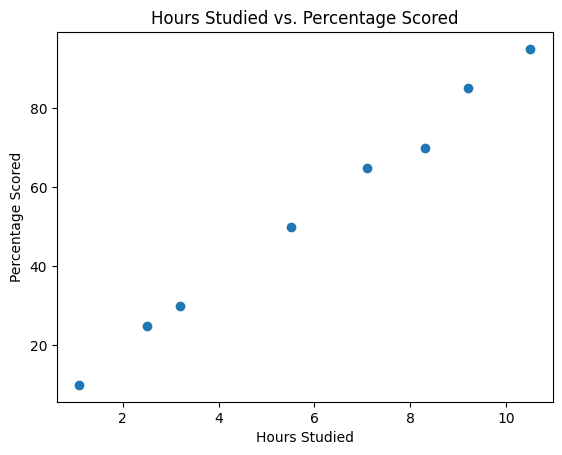

In [2]:
import matplotlib.pyplot as plt

# Scatter plot
# TODO: Add your code here
plt.scatter(data['Hours Studied'], data['Percentage Score'])
plt.title('Hours Studied vs. Percentage Scored')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

(b) Fit a linear regression model to the data.

In [3]:
# Task 2: Fitting a linear regression model
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df[['Hours Studied']]
y = df['Percentage Score']

# Initialize the model
model = LinearRegression()

# TODO: Fit the model
# model.fit(...)

model.fit(X, y)


# Print the model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 1.3655513869241815
Coefficient: 8.841257149886214


(c) Plot the regression line on the scatter plot.

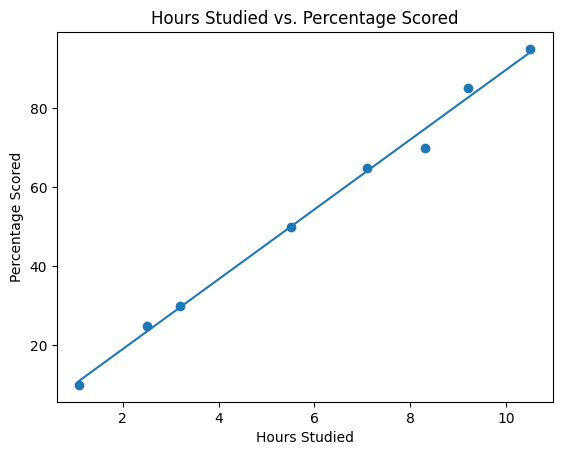

In [5]:
# Task 3: Plotting the regression line

# Generate prediction line
y_pred = model.predict(X)

# TODO: Add your code here
plt.plot(X, y_pred)
plt.title('Hours Studied vs. Percentage Scored')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.scatter(data['Hours Studied'], data['Percentage Score'])

# Display the plot
plt.show()

(d) Predict the percentage score for a student who studies for 6.5 hours.

In [11]:
# Task 4: Predicting the score
# TODO: Predict the percentage score for 6.5 hours of study
hours = 6.5
predicted_score = model.predict([[hours]])

print(f'Predicted score for {hours} hours of study: {predicted_score[0]:.2f}')

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Predicted score for 6.5 hours of study: 58.83
Mean Absolute Error (MAE): 1.46
Mean Squared Error (MSE): 4.11
Root Mean Squared Error (RMSE): 2.03


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Analysis Questions

(e) **Model Parameters**: What do the intercept and coefficient tell you about the relationship between hours studied and percentage score?
   
   - The intercept is the predicted percentage score given no hours studied.

   - The coefficient is the slope. The relationship between hours studied and percentage score.

(f) **Prediction Accuracy**: How accurate do you think the prediction for 6.5 hours is? Justify your answer using the data.
   
   Since there is no experimental data to compoare this prediction to, we can only measure the accuracy with the overall performance of the regression, that being the error evaluations:
   - Mean Absolute Error (MAE): 1.46
   - Root Mean Squared Error (RMSE): 2.03

   Since these errors are relatively much lower compared to the targeted variable, that being the percentage score, it can be assumed that the prediction for 6.5 is pretty good.

(g) **Model Fit**: Look at the scatter plot with the regression line. Does the line seem to fit the data well? Are there any outliers or patterns that the line does not capture?
   
   Visually it seems the line is able to capture the data very well. The data itself doesn't really have any outliers. But all the same it is not qualitively far off of the largest error point: 8.3 hours studied.

## 6. Polynomial Regression: Analyzing Overfitting and Model Fit (15 pts, 5 pts each)

In this exercise, you will visually analyze the effects of increasing the polynomial degree in regression modeling. By observing how the model fits the data and how the $R^2$ score varies, you'll gain insights into overfitting and determine an appropriate degree for polynomial regression.

**Generate and Plot Synthetic Data**:
- You'll use a synthetic dataset to clearly see the effects of model complexity.

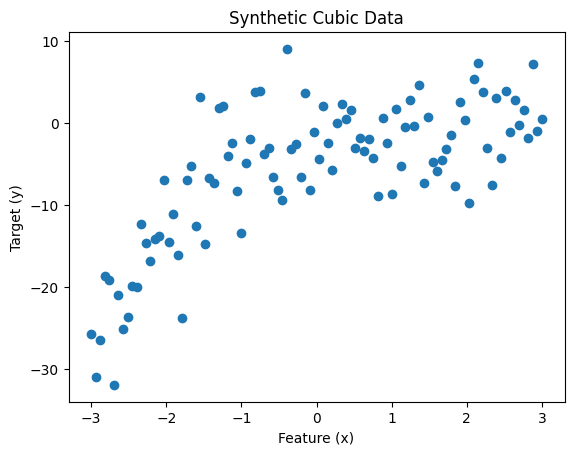

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Generating synthetic data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 0.5 * x**3 - 2 * x**2 + x + np.random.randn(100) * 5

# Visualizing the data
plt.scatter(x, y)
plt.title("Synthetic Cubic Data")
plt.xlabel("Feature (x)")
plt.ylabel("Target (y)")
plt.show()

**Experiment with Polynomial Degrees**:
- Experiment with different degrees and observe how the model's fit changes.
- Plot all results on one graph and display the \(R^2\) score for each degree to assess model performance.

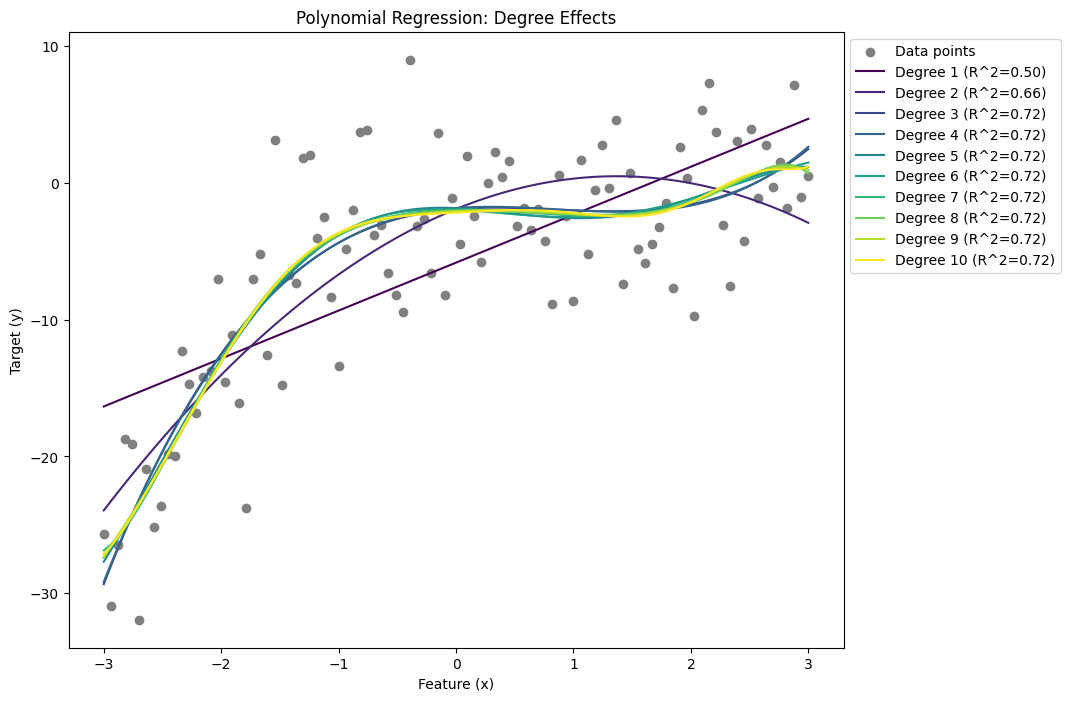

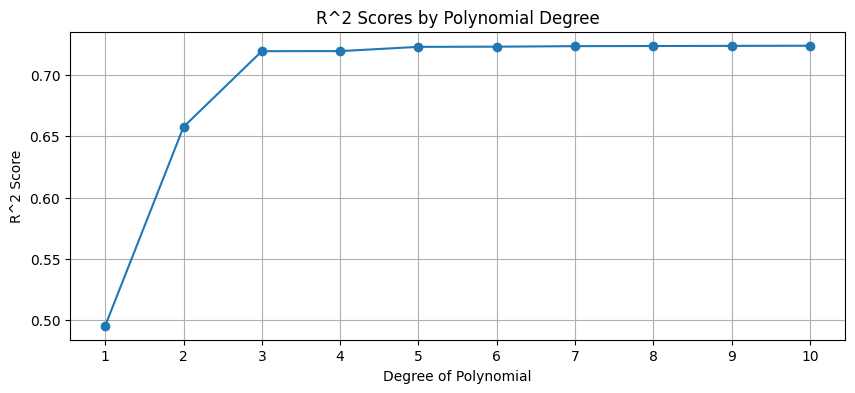

In [16]:
# Set the maximum degree of polynomial to test
max_degree = 10

# Prepare plotting
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color='grey', label='Data points')

colors = plt.cm.viridis(np.linspace(0, 1, max_degree))

# Analyze polynomial degrees from 1 to max_degree
r2_scores = []
for degree in range(1, max_degree + 1):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    y_pred = model.predict(x[:, np.newaxis])
    r2 = r2_score(y, y_pred)
    r2_scores.append(r2)
    # plt.plot(x, y_pred, color=colors[degree-1], label=f'Degree {degree} (R^2={r2})')
    plt.plot(x, y_pred, color=colors[degree-1], label=f'Degree {degree} (R^2={r2:.2f})')

# Plot settings
plt.title("Polynomial Regression: Degree Effects")
plt.xlabel("Feature (x)")
plt.ylabel("Target (y)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

# Plot R^2 scores
plt.figure(figsize=(10, 4))
plt.plot(range(1, max_degree + 1), r2_scores, marker='o')
plt.title("R^2 Scores by Polynomial Degree")
plt.xlabel("Degree of Polynomial")
plt.ylabel("R^2 Score")
plt.xticks(range(1, max_degree + 1))
plt.grid(True)
plt.show()

### Analysis Questions:

- (a) **Observe the Fit**: How does the fit change as the polynomial degree increases?
- (b) **Optimal Degree**: Based on the \(R^2\) score and visual inspection, what seems to be the optimal degree for the polynomial?
- (c) **Overfitting Signs**: At what degree do you start noticing overfitting? How can you tell?

A) As the polynomial degree increases, the R^2 score initially improves, indicating that the model is fitting the data better. Specifically:

- The R^2 score increases significantly from degree 1 to degree 3.
- Beyond degree 3, the R^2 score stabilizes and shows only minor improvements or remains constant.

B) Technically the closer to 1 the R^2 score is the better fit it is, so by definition the optimal degree for the polynomial is 10 as it has the maximum R^2 score, however, it is should be noted that with higher degree polynomials usually comes higher variance of the model (overfitting).

C) By definition around degree 3 as that is when the R^2 value essentially stops changing.

## 7. Bonus Question: Implementing SGD for Linear Regression and Comparison with Scikit-Learn (5 bonus pts)

Complete the missing lines of code to implement Stochastic Gradient Descent (SGD) for Linear Regression from scratch and compare the performance and results with Scikit-Learn's SGDRegressor.

### Task Description
- SGD Implementation: Fill in the missing lines of code to complete the basic version of SGD that fits a linear model to the synthetic data created previously. Initialize parameters randomly and update them using the gradient of the loss function computed from randomly sampled data points.
Use Scikit-Learn's SGDRegressor:
- Apply the SGDRegressor from Scikit-Learn to the same dataset using provided parameters.
- Comparison: Compare the coefficients and intercepts from both models.
Plot both models' predictions on the same graph to visually inspect the similarities or differences.

### Implementation Guide

(a) Fill in the `#TODO` lines to implement the SGD, plot the predictions and print the model parameters.

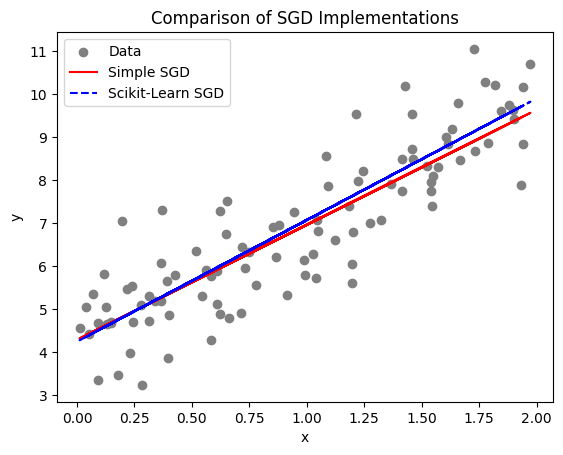

Our Simple SGD Coefficients: [2.66987073] Intercept: 4.2905333957784535
Scikit-Learn SGD Coefficients: [2.8242988] Intercept: [4.24438563]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# Generate some linear data
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

# Implementing simple SGD for Linear Regression
class SimpleSGDRegressor:
    def __init__(self, eta=0.01, n_iter=10000): # eta is the learning rate
        self.eta = eta
        self.n_iter = n_iter
        self.weights = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Random weight initialization
        self.weights = np.random.randn(n_features + 1)

        for _ in range(self.n_iter):
            for i in range(n_samples):
                index = np.random.randint(n_samples)
                xi = np.insert(X[index], 0, 1)  # Adding bias term
                yi = y[index]
                # TODO: Calculate the gradient and update weights

                y_pred = np.dot(self.weights, xi)

                error = y_pred - yi

                gradient = error * xi

                self.weights -= self.eta * gradient

    def predict(self, X):
        return np.dot(np.c_[np.ones((len(X), 1)), X], self.weights)

# Using Scikit-Learn's SGDRegressor
sklearn_sgd = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1, random_state=42)
sklearn_sgd.fit(x, y.ravel())

# Comparing implementations
our_sgd = SimpleSGDRegressor()
our_sgd.fit(x, y.ravel())

# Plotting predictions
plt.scatter(x, y, color='gray', label='Data')
plt.plot(x, our_sgd.predict(x), color='red', label='Simple SGD')
plt.plot(x, sklearn_sgd.predict(x), color='blue', linestyle='dashed', label='Scikit-Learn SGD')
plt.title("Comparison of SGD Implementations")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Print model parameters
print("Our Simple SGD Coefficients:", our_sgd.weights[1:], "Intercept:", our_sgd.weights[0])
print("Scikit-Learn SGD Coefficients:", sklearn_sgd.coef_, "Intercept:", sklearn_sgd.intercept_)

(b) Run the following code snippet. Compare the prediction accuracy of our simple SGD and the Scikit-learn SGD.

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate predictions
predictions_our_sgd = our_sgd.predict(x)
predictions_sklearn_sgd = sklearn_sgd.predict(x)

# Calculate Mean Squared Error
mse_our_sgd = mean_squared_error(y, predictions_our_sgd)
mse_sklearn_sgd = mean_squared_error(y, predictions_sklearn_sgd)

# Calculate R^2 Score
r2_our_sgd = r2_score(y, predictions_our_sgd)
r2_sklearn_sgd = r2_score(y, predictions_sklearn_sgd)

# Print the results
print("Mean Squared Error (Our SGD):", mse_our_sgd)
print("Mean Squared Error (Scikit-Learn SGD):", mse_sklearn_sgd)
print("R^2 Score (Our SGD):", r2_our_sgd)
print("R^2 Score (Scikit-Learn SGD):", r2_sklearn_sgd)

Mean Squared Error (Our SGD): 0.8104606500660129
Mean Squared Error (Scikit-Learn SGD): 0.8140525291701088
R^2 Score (Our SGD): 0.768164772784706
R^2 Score (Scikit-Learn SGD): 0.7671373026562548


So our's is slightly slightly better. Although small enough to be negligent and attributable to random factors.